## ライブラリ読み込み

In [0]:
import re
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import urllib.request
import lxml.html
import requests
import time

In [1]:
%cd drive/My Drive/口コミ分析

/content/drive/My Drive/口コミ分析


## スクレイピング

In [0]:
#食べログの日吉丸の口コミページのURL
#url = 'https://tabelog.com/fukuoka/A4008/A400801/40005698/dtlrvwlst/COND-0/smp1/?smp=1&lc=0&rvw_part=all&PG='
#食べログ弐の弐URL
url = 'https://tabelog.com/fukuoka/A4001/A400103/40019491/dtlrvwlst/COND-0/smp1/?smp=1&lc=0&rvw_part=all&PG='
url_list = []

In [0]:
#口コミページは全部で3ページ分あるからurl_listに全URLを格納
for i in range(1,4):
  tmp_url = url + str(i)
  url_list.append(tmp_url)  

In [5]:
url_list

['https://tabelog.com/fukuoka/A4001/A400103/40019491/dtlrvwlst/COND-0/smp1/?smp=1&lc=0&rvw_part=all&PG=1',
 'https://tabelog.com/fukuoka/A4001/A400103/40019491/dtlrvwlst/COND-0/smp1/?smp=1&lc=0&rvw_part=all&PG=2',
 'https://tabelog.com/fukuoka/A4001/A400103/40019491/dtlrvwlst/COND-0/smp1/?smp=1&lc=0&rvw_part=all&PG=3']

In [0]:
class Taberog:
  def __init__(self, url_list,):
    self.url_list = url_list
    self.a_list = []
    self.detail_url_list = []
    self.review_list = []

  def a_list_get(self):
    for url in self.url_list:
      time.sleep(2)
      res = requests.get(url)
      soup = BeautifulSoup(res.content, 'html.parser')
      #aタグのこのclass名に各口コミのurlがある
      review_list = soup.find_all('a', class_='rvw-item__showall-trigger js-show-review-items')
      #各口コミのurlに飛ぶ規則的な数値がdata-bookmark-idに記入されているから取得する
      for review in review_list:
        rvw = review.get('data-bookmark-id')
        self.a_list.append(rvw)

  def detail_url_get(self):
    #各口コミのurlをdetail_url_listに格納
    for i in range(len(self.a_list)):
      detail_url = 'https://tabelog.com/fukuoka/A4001/A400103/40019491/dtlrvwlst/B'+self.a_list[i]+'/?use_type=0&rvw_part=all&lc=0&smp=1'
      #detail_url = 'https://tabelog.com/fukuoka/A4008/A400801/40005698/dtlrvwlst/B' + self.a_list[i] + '/?use_type=0&smp=1'
      self.detail_url_list.append(detail_url)
  
  def review_get(self):
    for det_url in self.detail_url_list:
      time.sleep(2)
      res = requests.get(det_url)
      soup = BeautifulSoup(res.content, 'html.parser')
      #divタグを取得
      div = soup.find('div', class_='rvw-item__rvw-comment')
      #pタグを取得。pタグが口コミのテキスト内容
      review = div.find('p')
      self.review_list.append(review)
      print('ok')

  def delete_tag(self):
    #pタグ削除
    p = re.compile(r"<[^>]*?>")
    self.review_text = p.sub("", str(self.review_list))
    #空白削除
    self.review_text = self.review_text.replace('\t', '')

In [8]:
taberogu = Taberog(url_list)
taberogu.a_list_get()
taberogu.detail_url_get()
taberogu.review_get()
taberogu.delete_tag()

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


In [0]:
 #レビューの文字列をtextファイルに書き込んで保存
 with open('ninoni_review.txt', 'w', encoding='utf-8') as file:
  file.write(taberogu.review_text)
file.close()

## 形態素解析

In [10]:
!pip install mecab-python3
!pip install japanize-matplotlib
!pip install venn

from wordcloud import WordCloud
import MeCab
import matplotlib.pyplot as plt
import japanize_matplotlib #日本語化matplotlib
import collections
import venn
import datetime as dt
import seaborn as sns
sns.set(font="IPAexGothic") #日本語フォント設定
!apt-get -y install fonts-ipafont-gothic #日本語フォントのインストール

     |████████████████████████████████| 17.1MB 232kB/s 
     |████████████████████████████████| 4.1MB 4.8MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.2-cp36-none-any.whl size=4120191 sha256=6afc4c942fe3ebeba45df4d62ef70e5b8c69f3c23406112fb4df9f0a10170562
  Stored in directory: /root/.cache/pip/wheels/9c/f9/fc/bc052ce743a03f94ccc7fda73d1d389ce98216c6ffaaf65afc
Successfully built japanize-matplotlib
  Created wheel for venn: filename=venn-0.1.3-cp36-none-any.whl size=19701 sha256=f59e8943e6c6b9cd95d9b55eff5964f1e1a5c9624d348589cacb557a720ca091
  Stored in directory: /root/.cache/pip/wheels/41/e4/83/4269e8fb3c81b09363ebe355c373b14b0b947394d2af541734
Successfully built venn


/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 32 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 0s (37.7 MB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 144467 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ipa

In [0]:
bindata = open('ninoni_review.txt', 'rb').read()
hiyoshi = bindata.decode('utf-8')

In [0]:
#不要な文字の除去
hiyoshi = hiyoshi.replace('\n', '')
hiyoshi = hiyoshi.replace('[', '')
hiyoshi = hiyoshi.replace(']', '')

In [24]:
#改行を境にリスト化
lines = hiyoshi.split('\n')
lines

["          今日は、会社の送別会でコチラのお店へ訪問です！比較的若い子が多いお店なのに、奥のテーブル席をスーツを着たおじさん連中が陣取るという構図に…すみません…このお店と料理が大好きなもので…笑さて、それではさっそく気になる食べ物を注文…！・焼餃子・棒棒鶏・青菜の強火炒め・上海エビチリソース・名物四川麻婆豆腐・野菜たっぷり焼ビーフン・炒飯やはり焼餃子、青菜炒め、麻婆豆腐は外せません…ビール片手に焼餃子を…という最高の組み合わせに麻婆豆腐と炒飯をセットにしたりと箸が止まらず…併せてビールジョッキも止まらずで、まさに至福…仕事終わりに、これ以上の幸せはありません…！笑終盤まで皆が今日は送別会ということを忘れるほど主役も含めてワイワイと楽しく過ごせました…！笑お腹も満足…さて、２軒目はしっぽり飲もうっと！        ,           以前は警固の店舗の方に行ってみてかなり気に入ったのでこちらのお店にも行ってきました。まだ5時ちょっと過ぎだというのに店内は満席、私たちも外で20分ぐらいは待ったでしょうか。雪がちらつく中ようやく中に入ることができました。中はいかにも庶民のお店という感じで雑多ではありますが明るく店員さんもテキパキと動いています。 今回は1500円のコースを二人前と単品の焼き餃子を注文しました。 ハッピーアワーは焼き餃子と生ビールレモンサワーなどの飲み物が半額となっています。かなりお得です。 こちらのよだれどりが結構好きなので1500円のコースに入っているのは嬉しいですね。あとはたたききゅうり唐揚げ アスパラと豚の炒め物 麻婆豆腐 エビマヨなど かなりお腹いっぱいになるボリュームのたっぷりしたコースです。これが1500円なのはかなりお得だと思います。 飲み物も含めて2000円いかないぐらいなのでとんでもなくお得なお店ですよね。 私は特にエビマヨのプリプリ感が好きでした。 庶民の味方です。ごちそうさまでした。        ,           大名でいつもお客さんが並んでいるお店なのでいつか行きたいと思っていたところ、大名で早い時間に集まろうという機会があったので、行ってきました。オープン前から20人程度のお客さんが並んでいました。相変わらずすごい！僕は予約を入れていたのでスルスルと入店できました。なんかすみません。席に着くとハッピーア

In [25]:
#分かち書き
mecab = MeCab.Tagger('-Ochasen')
#パーサーにデータを渡す前にこれを挟むことで、UnicodeDecodeErrorを避けることが出来る。
mecab.parse('')

'EOS\n'

In [0]:
#surface(単語)feature(品詞情報)を持つ解析結果を代入
node = mecab.parseToNode(lines[0])

In [0]:
output = []
stoplist = ['「', '」']

In [28]:
while node:
  word_type = node.feature.split(',')[0]
  if word_type in ['名詞', '形容詞', '副詞', '動詞']:
    if not node.surface in stoplist and not node.surface.isdigit():
      output.append(node.surface.upper())
  node = node.next
print(output)

['今日', '会社', '送別', '会', 'コチラ', '店', '訪問', '比較的', '若い', '子', '多い', '店', '奥', 'テーブル', '席', 'スーツ', '着', 'おじさん', '連中', '陣取る', '構図', '店', '料理', '大好き', 'もの', '笑', 'さっそく', '気', 'なる', '食べ物', '注文', '餃子', '棒', '棒', '鶏', '青菜', '強火', '炒め', '上海', 'エビ', 'チリ', 'ソース', '名物', '四川', '麻', '婆', '豆腐', '野菜', 'たっぷり', 'ビーフン・', '炒飯', 'やはり', '餃子', '青菜', '炒め', '麻', '婆', '豆腐', '外せ', 'ビール', '片手', '餃子', '最高', '組み合わせ', '麻', '婆', '豆腐', '炒飯', 'セット', 'し', '箸', '止まら', '併せ', 'ビール', 'ジョッキ', '止まら', 'まさに', '至福', '仕事', '終わり', 'これ', '以上', '幸せ', 'あり', '笑', '終盤', '皆', '今日', '送別', '会', 'こと', '忘れる', '主役', '含め', 'ワイワイ', '楽しく', '過ごせ', '笑お', '腹', '満足', '軒', '目', 'しっぽり', '飲も', ',', '以前', '警固', '店舗', '方', '行っ', 'み', 'かなり', '気に入っ', 'こちら', '店', '行っ', 'き', 'まだ', '時', 'ちょっと', '過ぎ', 'いう', '店内', '満席', '私', 'たち', '外', '分', '待っ', '雪', 'ちらつく', '中', 'ようやく', '中', '入る', 'こと', 'でき', '中', 'いかにも', '庶民', '店', '感じ', '雑多', 'あり', '明るく', '店員', 'さん', 'テキパキ', '動い', 'い', '今回', '円', 'コース', '二', '人前', '単品', '焼き', '餃子', '注文', 'し', 'ハッピーアワー', '焼き', '餃子', '生ビール',

In [29]:
#リストを空白を境に文字列化
text = ' '.join(output)
text

"今日 会社 送別 会 コチラ 店 訪問 比較的 若い 子 多い 店 奥 テーブル 席 スーツ 着 おじさん 連中 陣取る 構図 店 料理 大好き もの 笑 さっそく 気 なる 食べ物 注文 餃子 棒 棒 鶏 青菜 強火 炒め 上海 エビ チリ ソース 名物 四川 麻 婆 豆腐 野菜 たっぷり ビーフン・ 炒飯 やはり 餃子 青菜 炒め 麻 婆 豆腐 外せ ビール 片手 餃子 最高 組み合わせ 麻 婆 豆腐 炒飯 セット し 箸 止まら 併せ ビール ジョッキ 止まら まさに 至福 仕事 終わり これ 以上 幸せ あり 笑 終盤 皆 今日 送別 会 こと 忘れる 主役 含め ワイワイ 楽しく 過ごせ 笑お 腹 満足 軒 目 しっぽり 飲も , 以前 警固 店舗 方 行っ み かなり 気に入っ こちら 店 行っ き まだ 時 ちょっと 過ぎ いう 店内 満席 私 たち 外 分 待っ 雪 ちらつく 中 ようやく 中 入る こと でき 中 いかにも 庶民 店 感じ 雑多 あり 明るく 店員 さん テキパキ 動い い 今回 円 コース 二 人前 単品 焼き 餃子 注文 し ハッピーアワー 焼き 餃子 生ビール レモンサワー 飲み物 半額 なっ い かなり 得 こちら だれ どり 結構 好き 円 コース 入っ いる の 嬉しい あと たたき きゅうり 唐 揚げ アスパラ 豚 炒め 物 麻 婆 豆腐 エビマヨ かなり お腹 いっぱい なる ボリューム たっぷり し コース これ 円 の かなり 得 思い 飲み物 含め 円 いか とんでも 得 店 私 特に エビマヨ プリプリ 感 好き 庶民 味方 ごちそうさま , 大名 いつも お客 さん 並ん いる 店 いつか 行き 思っ い ところ 大名 早い 時間 集まろ 機会 あっ 行っ き オープン 前 人 程度 お客 さん 並ん い 相変わらず すごい 僕 予約 入れ い スルスル 店 でき 席 着く ハッピー アワー 得 商品 ビール 焼き 餃子 注文 割り引き なく これ 頼む 届い 餃子 普通 うまい 小ぶり ひと 口 餃子 パクパク 何 個 食べ られ ちゃう 系 せっかく 他 餃子 注文 し 個人 的 焼き 餃子 一番 うまい これ ビール あれ 満足 でき そう 他 いろいろ 一品 料理 注文 し ニンニク 芽 いため 

## WordCloud

In [0]:
df = pd.DataFrame(output,columns=['word'])
df['count'] = 1
df = df.groupby('word').sum()
df = df.sort_values('count', ascending=False)
df = df.reset_index()

In [31]:
df

,word,count
0,餃子,214
1,し,118
2,店,106
3,円,79
4,食べ,67
...,...,...
1767,差,1
1768,巻,1
1769,ゅわっと,1
1770,やる,1


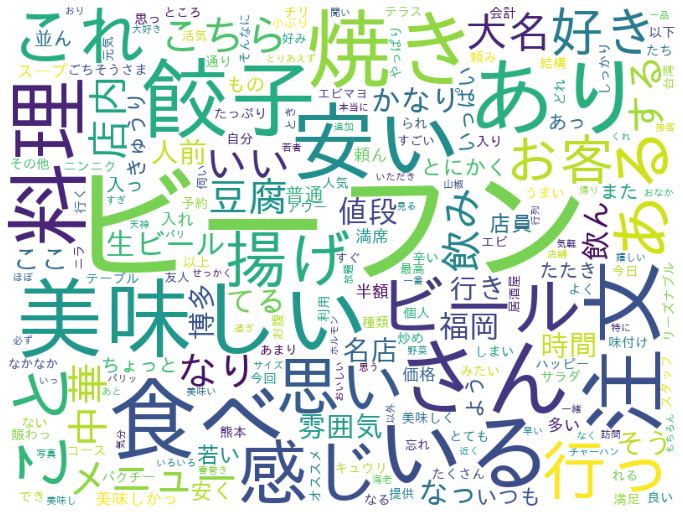

In [32]:
fpath = '/usr/share/fonts/truetype/fonts-japanese-gothic.ttf'

wordcloud = WordCloud(background_color="white",
                      font_path = fpath, 
                      width = 800,
                      height = 600,
                      collocations = False).generate(" ".join(df['word']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis("off") #メモリの非表示
plt.show()

In [34]:
wordcloud.to_file('ninoni.png')
